# Grid_Searching of SVC Values: C_values = [0.001, 0.01, 0.1, 1.0, 10]
## Each iteration computes TPR, FPR, and Threshold Values for ROC


Iteration:  1

____________________________________________________________
Training: 
SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)


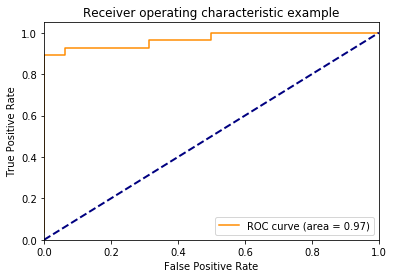

Iteration:  2

____________________________________________________________
Training: 
SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)


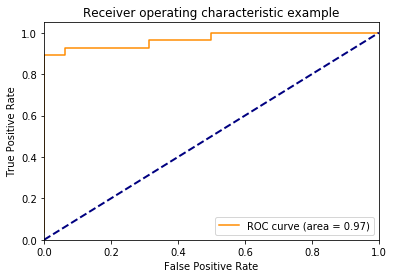

Iteration:  3

____________________________________________________________
Training: 
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)


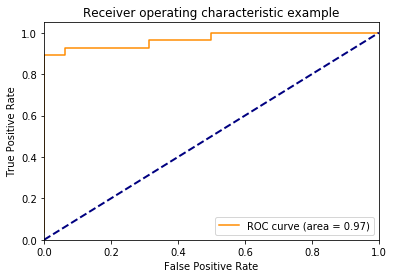

Iteration:  4

____________________________________________________________
Training: 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)


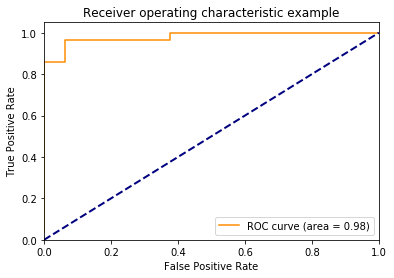

Iteration:  5

____________________________________________________________
Training: 
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)


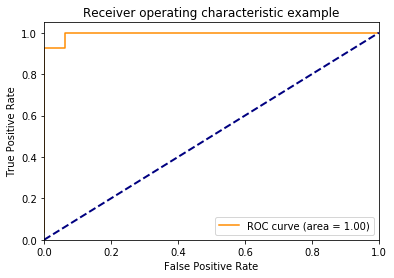

In [35]:
C_values = [0.001, 0.01, 0.1, 1.0, 10]
results_accuracy_score = []
results_tpr_fpr_threshold = []

count = 0
for C_val in C_values:
    count+=1
    print("Iteration: ", str(count))
    print("==================\n")
    classifier = svm.SVC(kernel='linear', probability=True, C=C_val, random_state=0)
    print('_'*60)
    print("Training: ")
    print(classifier)
    probas_ = classifier.fit(X_train, train_corpus_target).predict_proba(X_test)

    # print("shape test_corpus_target: ", np.shape(test_corpus_target))
    # print("shape probas: ", np.shape(probas_[:, 0]))

    pred = classifier.predict(X_test)

    score = metrics.accuracy_score(test_corpus_target, pred)

    results_accuracy_score.append(score)

    fpr, tpr, thres = roc_curve(np.array(test_corpus_target), probas_[:, 1], pos_label=1, drop_intermediate=False)
    roc_auc = auc(fpr, tpr)

    results = []
    for i in range(len(fpr)):
        results.append({
            'tpr': tpr[i],
            'fpr': fpr[i],
            'threshold': thres[i]
        })
        
    results_tpr_fpr_threshold.append(results)
    
    # printing ROC
    plt.figure()
    lwr = 2
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lwr, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [36]:
results_accuracy_score

[0.63636363636363635,
 0.63636363636363635,
 0.79545454545454541,
 0.86363636363636365,
 0.95454545454545459]

In [41]:
def query_results(C_val_index, index):
    print(results_tpr_fpr_threshold[C_val_index][index])

query_results(0, 0)

{'tpr': 0.035714285714285712, 'fpr': 0.0, 'threshold': 0.93480886218993176}
